In [1]:
import pandas as pd
import os
from sklearn.preprocessing import minmax_scale


import matplotlib.pyplot as plt
import matplotlib
import seaborn as sb

font = {'family' : 'Arial',
        'size'   : 14}

matplotlib.rc('font', **font)
matplotlib.rc('ytick', labelsize=14)
matplotlib.rc('xtick', labelsize=14)
matplotlib.rcParams["figure.dpi"] = 140

In [2]:
methods = ('cvae', 'scvi', 'symphony', 'seurat')
conds = ('control', 'stimulated')

In [3]:
repl = dict(cvae='expiMap', qtr='expiMap', scvi='scVI', seurat='Seurat', symphony='Symphony')

In [4]:
folder = 'kang_no_le_metrics/'
filenames = os.listdir(folder)

In [5]:
metrics = {}
for file in filenames:
    for cond in conds:
        for method in methods:
            if method in file and cond in file:
                df = pd.DataFrame(pd.read_pickle(folder+file), index=[repl[method]])
                del df['adata_name']
                if cond in metrics:
                    metrics[cond] = metrics[cond].append(df)
                else:
                    metrics[cond] = df

In [6]:
metrics['control'].rename_axis('methods', inplace=True)

In [7]:
metrics['control']

,PC_regression,ASW_batch,kBET,graph_connectivity,graph_iLISI,graph_cLISI,NMI,ARI,ASW_cell_type
methods,,,,,,,,,
expiMap,0.917290,0.984697,0.325171,0.932479,1.763039e-01,0.364903,0.722660,0.677607,0.505193
scVI,0.804964,0.824839,0.085352,0.980285,1.103780e-02,0.865369,0.695296,0.636402,0.518656
Seurat,0.301125,0.641337,0.006364,0.952870,0.000000e+00,0.919002,0.716216,0.654591,0.513468
Symphony,0.526308,0.630974,0.015735,0.932421,2.220446e-16,0.912897,0.694415,0.619372,0.549256


In [8]:
#metrics['control'] = metrics['control'].apply(minmax_scale)

In [9]:
metrics['control']['batch'] = metrics['control'].iloc[:, :5].mean(axis=1)
metrics['control']['bio'] = metrics['control'].iloc[:, 5:9].mean(axis=1)

In [10]:
metrics['control']['overall'] = metrics['control']['batch']*0.4 + metrics['control']['bio']*0.6

In [11]:
metrics['control']

,PC_regression,ASW_batch,kBET,graph_connectivity,graph_iLISI,graph_cLISI,NMI,ARI,ASW_cell_type,batch,bio,overall
methods,,,,,,,,,,,,
expiMap,0.917290,0.984697,0.325171,0.932479,1.763039e-01,0.364903,0.722660,0.677607,0.505193,0.667188,0.567591,0.607430
scVI,0.804964,0.824839,0.085352,0.980285,1.103780e-02,0.865369,0.695296,0.636402,0.518656,0.541296,0.678931,0.623877
Seurat,0.301125,0.641337,0.006364,0.952870,0.000000e+00,0.919002,0.716216,0.654591,0.513468,0.380339,0.700819,0.572627
Symphony,0.526308,0.630974,0.015735,0.932421,2.220446e-16,0.912897,0.694415,0.619372,0.549256,0.421088,0.693985,0.584826


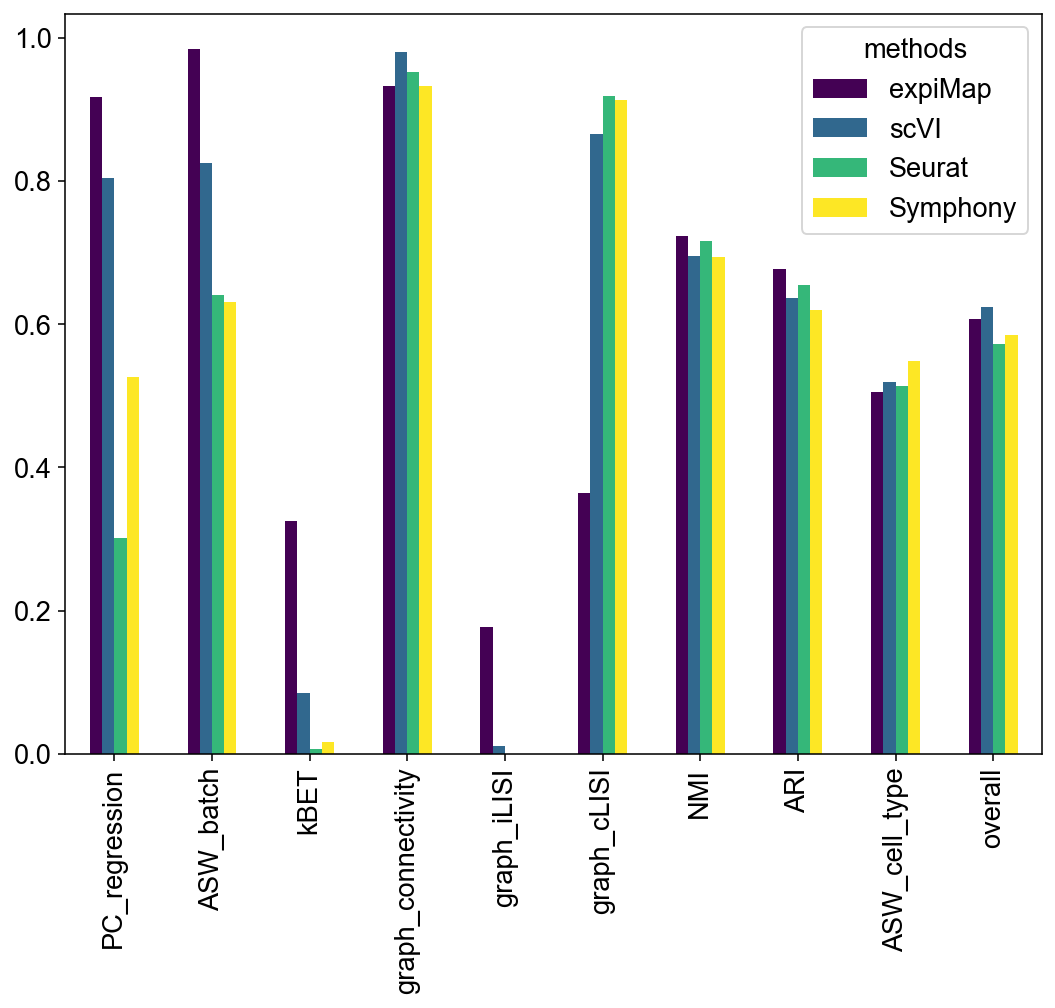

In [12]:
axs = metrics['control'].drop(columns=['bio', 'batch']).T.plot.bar(figsize=(9,7), colormap='viridis')

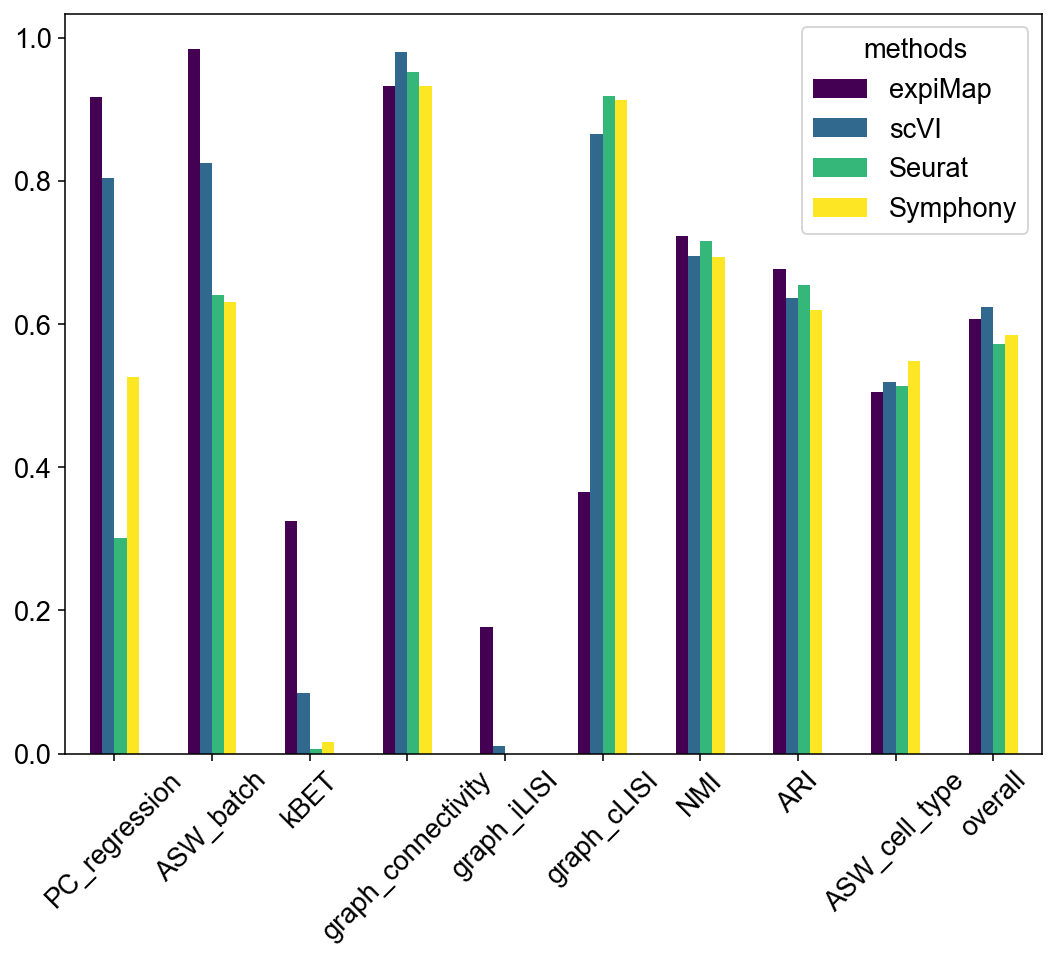

In [13]:
axs.set_xticklabels(axs.get_xticklabels(), rotation=45)
axs.figure

In [45]:
metrics['control'].rename_axis('methods', inplace=True)

(0.0, 1.0)

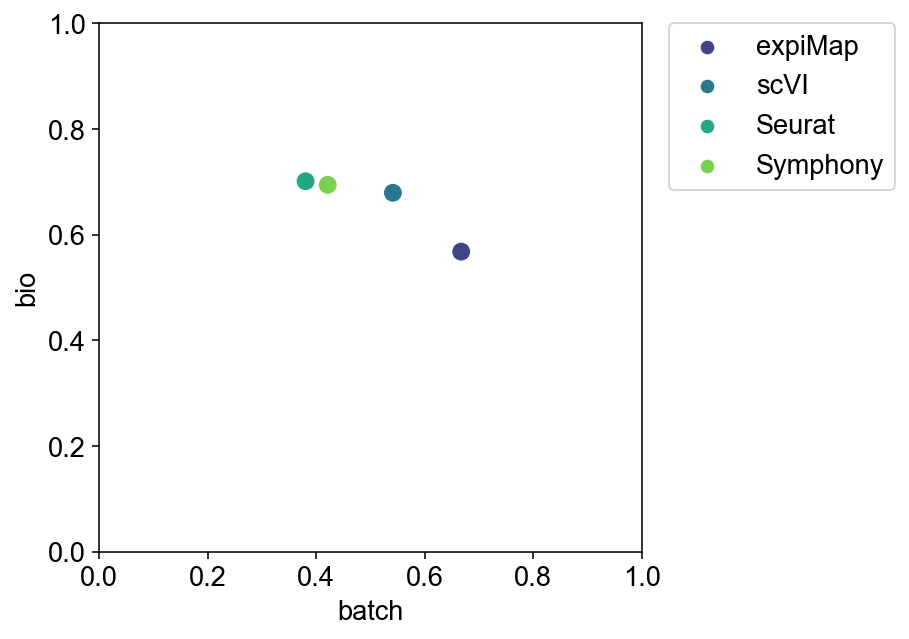

In [16]:
rcParams['figure.figsize']=(5,5)
sb.scatterplot(x='batch',y='bio',hue='methods',s=100,
                       data=metrics['control'], palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlim(0,1)
plt.ylim(0,1)

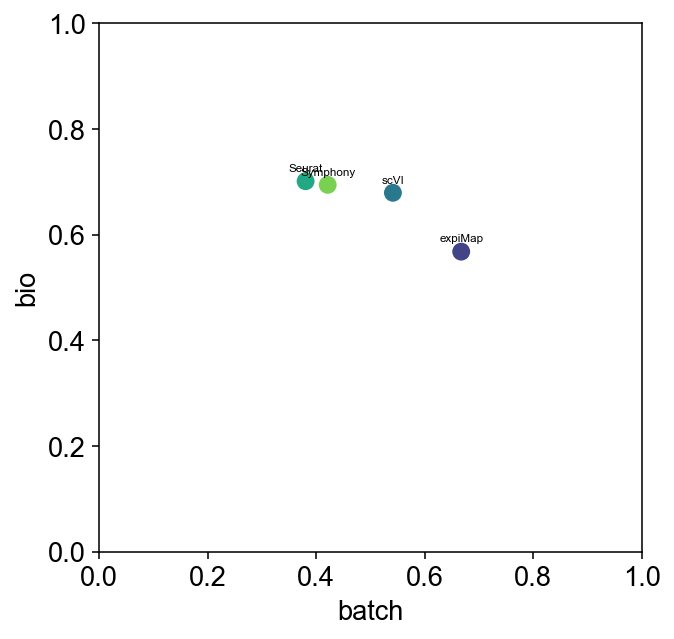

In [17]:
rcParams['figure.figsize']=(5,5)
ax = sb.scatterplot(x='batch',y='bio',hue='methods',s=100,
                       data=metrics['control'], palette='viridis', legend=False)
plt.xlim(0,1)
plt.ylim(0,1)

df = metrics['control']

for l in range(df.shape[0]):
    ax.text(df['batch'][l], df['bio'][l]+0.019, df.index[l], horizontalalignment='center', size=6, color='black')

In [18]:
metrics['control'].drop(columns=['graph_iLISI', 'graph_cLISI'], inplace=True)

In [19]:
metrics['control']['bio'] = metrics['control'].iloc[:, 4:7].mean(axis=1)
metrics['control']['batch'] = metrics['control'].iloc[:, :4].mean(axis=1)

In [20]:
metrics['control']

,PC_regression,ASW_batch,kBET,graph_connectivity,NMI,ARI,ASW_cell_type,batch,bio,overall
methods,,,,,,,,,,
expiMap,0.917290,0.984697,0.325171,0.932479,0.722660,0.677607,0.505193,0.789909,0.635154,0.607430
scVI,0.804964,0.824839,0.085352,0.980285,0.695296,0.636402,0.518656,0.673860,0.616785,0.623877
Seurat,0.301125,0.641337,0.006364,0.952870,0.716216,0.654591,0.513468,0.475424,0.628091,0.572627
Symphony,0.526308,0.630974,0.015735,0.932421,0.694415,0.619372,0.549256,0.526359,0.621014,0.584826


In [21]:
metrics['control']['overall'] = metrics['control']['batch']*0.4 + metrics['control']['bio']*0.6

<AxesSubplot:>

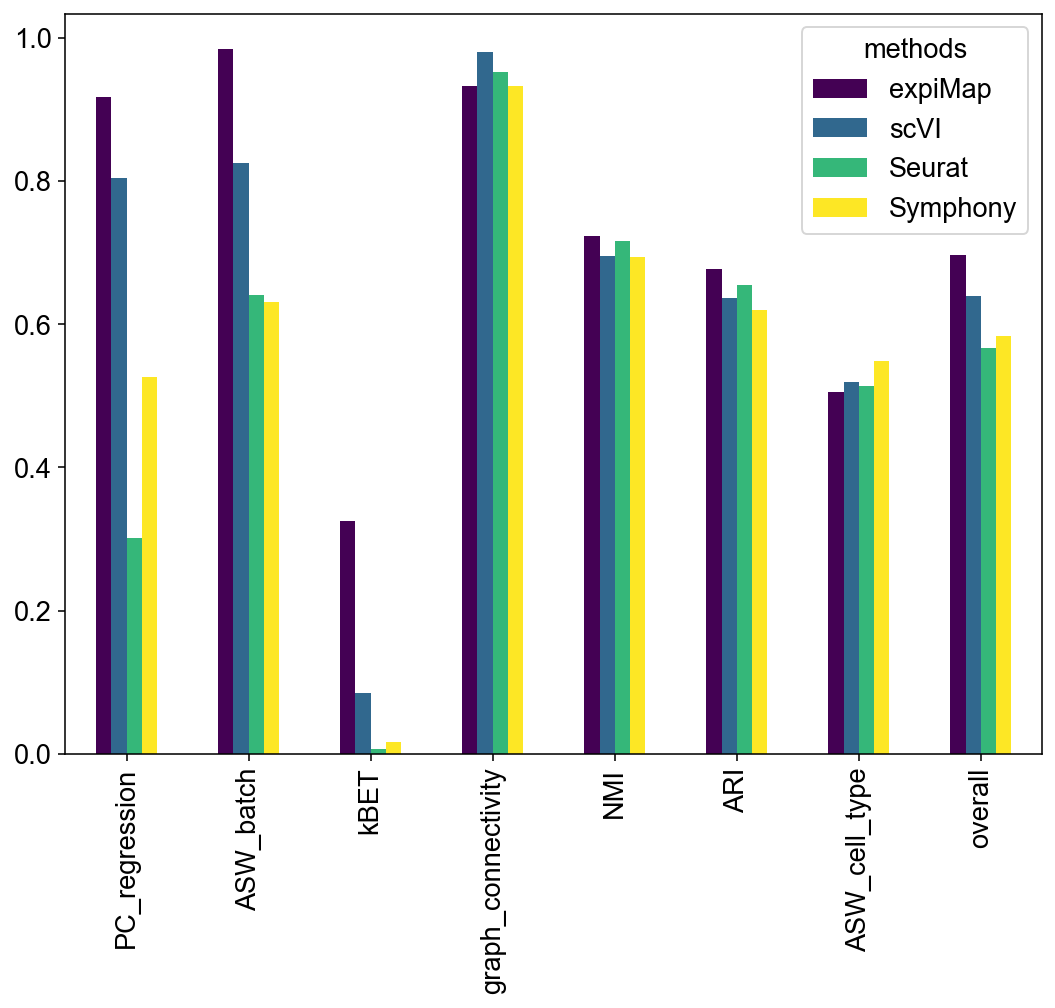

In [22]:
metrics['control'].drop(columns=['bio', 'batch']).T.plot.bar(figsize=(9,7), colormap='viridis')